In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

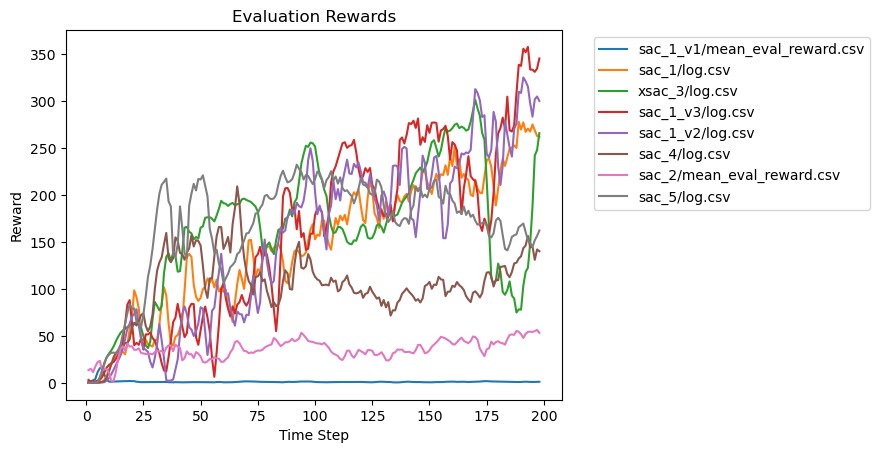

In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders and file names
target_folder = '/Users/nicolasvila/workplace/uni/tfg/tests/lightning_research_framework/results/XSAC_TEST'

folders = [folder for folder in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, folder))]

for folder in folders:
    folder_path = os.path.join(target_folder, folder)
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Loop through each CSV file and read 'eval/reward' column
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        
        # Check if 'eval/reward' column exists in the DataFrame
        if 'eval/reward' in df.columns:
            smoothed_rewards = df['eval/reward'].rolling(window=3, center=True).mean()
            
            # Plot the smoothed 'eval/reward' column
            plt.plot(smoothed_rewards, label=f"{folder}/{csv_file}")

# Customize the plot
plt.title('Evaluation Rewards')
plt.xlabel('Time Step')
plt.ylabel('Reward')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

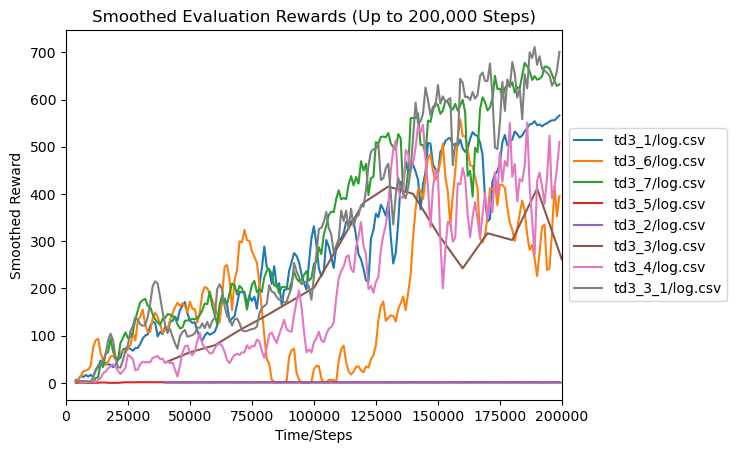

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the folders and file names
target_folder = '/Users/nicolasvila/workplace/uni/tfg/tests/lightning_research_framework/results/XTD3_TEST'
# Get all subfolders within the target folder
folders = [folder for folder in os.listdir(target_folder) if os.path.isdir(os.path.join(target_folder, folder))]

# Initialize an empty DataFrame to store the data
all_data = pd.DataFrame()

# Initialize a list to store legends
legends = []

# Loop through each folder and read CSV files
for folder in folders:
    folder_path = os.path.join(target_folder, folder)
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Loop through each CSV file and read 'eval/reward' and 'time/steps' columns
    for csv_file in csv_files:
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        
        # Check if both 'eval/reward' and 'time/steps' columns exist in the DataFrame
        if 'eval/reward' in df.columns and 'time/steps' in df.columns:
            # Apply smoothing with a window size of 10 to 'eval/reward' column
            smoothed_rewards = df['eval/reward'].rolling(window=3, center=True).mean()
            
            # Plot the smoothed 'eval/reward' column using 'time/steps' as the x-axis
            plt.plot(df['time/steps'], smoothed_rewards, label=f"{folder}/{csv_file}")
            
            # Store legend information
            legends.append(f"{folder}/{csv_file}")

            # Limit x-axis to 200,000 steps
            plt.xlim(0, 200000)

# Customize the plot
plt.title('Smoothed Evaluation Rewards (Up to 200,000 Steps)')
plt.xlabel('Time/Steps')
plt.ylabel('Smoothed Reward')
plt.legend(legends, loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside the plot
plt.show()

In [11]:
import pandas as pd

# Define the file paths
file1 = '/Users/nicolasvila/workplace/uni/TFG/tests/lightning_research_framework/results/XSAC_TEST/sac_2/log.csv'
file2 = '/Users/nicolasvila/workplace/uni/TFG/tests/lightning_research_framework/results/XSAC_TEST/sac_2/log copy.csv'
file3 = '/Users/nicolasvila/workplace/uni/TFG/tests/lightning_research_framework/results/XSAC_TEST/sac_2/log copy 2.csv'

# Read the files into dataframes
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Compute the mean of the 'eval/reward' field
mean_reward = (df1['eval/reward']+ df2['eval/reward'] + df3['eval/reward']) / 3

# Create a new dataframe with the mean 'eval/reward'
mean_df = pd.DataFrame({'eval/reward': mean_reward,
                        'time/steps': df1['time/steps']})

# Output the new dataframe to a CSV file
mean_df.to_csv('/Users/nicolasvila/workplace/uni/TFG/tests/lightning_research_framework/results/mean_eval_reward.csv', index=False)
